To do this, we're going to start by following along with the tutorial found here: https://www.dataquest.io/blog/python-api-tutorial/
in the hopes of getting a basic feel for calling APIs. After we get some idea of what we're doing, we'll move into actually working with the NREL API.

In [1]:
import requests

In [2]:
#First we'll work with the Open-Notify API to get a feel for working with requests, before we have to sign up with NREL.
response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code)

200


Ok, so 200 means that we got our data as expected. 
We can get other responses too.

In [3]:
response = requests.get("http://api.open-notify.org/iss-pass")
print(response.status_code)

404


By calling a bad url, we get 404, which means resource not found on the server.

In [4]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)

400


We get 400 because we made a bad request. This particular request requires you to pass additional parameters, latitude and longitude. 

In [5]:
#In order to add those parameters, we'll pass a dictionary to the requests package that contians those params.
parameters = {"lat": 40.71, "lon": -74}
response = requests.get("http://api.open-notify.org/iss-pass.json", params = parameters)
#To get the data that the request returned, we can specify .content
print(response.content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1556073369, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 487, \n      "risetime": 1556099161\n    }, \n    {\n      "duration": 646, \n      "risetime": 1556104844\n    }, \n    {\n      "duration": 599, \n      "risetime": 1556110682\n    }, \n    {\n      "duration": 550, \n      "risetime": 1556116560\n    }, \n    {\n      "duration": 604, \n      "risetime": 1556122384\n    }\n  ]\n}\n'


Ok, so that above is obviously awful. We'll have to use JSON to format the string. 
We have to input the JSON package found in python to interact with them, but we can do a lot with it. 

In [6]:
import json

In [13]:
best_food_chains = ["Taco Bell", "Shake Shack", "Chipotle"]

# Use json.dumps to convert best_food_chains to a string.
best_food_chains_string = json.dumps(best_food_chains)

# We've successfully converted our list to a string.
print(type(best_food_chains_string))

# Convert best_food_chains_string back into a list
print(type(json.loads(best_food_chains_string)))
print(json.loads(best_food_chains_string))
print(best_food_chains_string)

# Make a dictionary
fast_food_franchise = {
    "Subway": 24722,
    "McDonalds": 14098,
    "Starbucks": 10821,
    "Pizza Hut": 7600
}

# We can also dump a dictionary to a string and load it.
fast_food_franchise_string = json.dumps(fast_food_franchise)
print(type(fast_food_franchise_string))
print(type(fast_food_franchise))

<class 'str'>
<class 'list'>
['Taco Bell', 'Shake Shack', 'Chipotle']
["Taco Bell", "Shake Shack", "Chipotle"]
<class 'str'>
<class 'dict'>


In [14]:
#Ok, so there's some idiosyncracies there, but I think that's the gist of putting in and out of JSON. 
#Let's move to JSON and the API specifically

# Make the same request we did earlier, but with the coordinates of San Francisco instead.
parameters = {"lat": 37.78, "lon": -122.41}
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

# Get the response data as a python object.  Verify that it's a dictionary.
data = response.json()
print(type(data))
print(data)

<class 'dict'>
{'message': 'success', 'request': {'altitude': 100, 'datetime': 1556074623, 'latitude': 37.78, 'longitude': -122.41, 'passes': 5}, 'response': [{'duration': 511, 'risetime': 1556110224}, {'duration': 645, 'risetime': 1556115925}, {'duration': 560, 'risetime': 1556121792}, {'duration': 477, 'risetime': 1556127702}, {'duration': 556, 'risetime': 1556133532}]}


In [17]:
print(response.headers)

{'Server': 'nginx/1.10.3', 'Date': 'Wed, 24 Apr 2019 02:57:03 GMT', 'Content-Type': 'application/json', 'Content-Length': '521', 'Connection': 'keep-alive', 'Via': '1.1 vegur'}


In [18]:
#To access a specific entry
print(response.headers['content-type'])

application/json


Ok, that's the whole of the tutorial on APIs. I think there's enough there to get started on interacting with the NREL site. 

In [24]:
#GET /api/pvwatts/v6.format?parameters
#tilt = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
parameters = {"format": 'JSON', "api_key": "DEMO_KEY", "system_capacity": 4, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 45, "azimuth": 180, "lat": 64.82, "lon": -147.87, "dataset": 'tmy2'}
nrel_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = parameters)

In [32]:
print(nrel_response.content)

b'{"inputs":{"format":"JSON","system_capacity":"4","module_type":"0","losses":"14.08","array_type":"0","tilt":"45","azimuth":"180","lat":"64.82","lon":"-147.87","dataset":"tmy2"},"errors":[],"warnings":[],"version":"1.0.1","ssc_info":{"version":45,"build":"Linux 64 bit GNU/C++ Jul  7 2015 14:24:09"},"station_info":{"lat":64.81666564941406,"lon":-147.86666870117188,"elev":138.0,"tz":-9.0,"location":"26411","city":"FAIRBANKS","state":"AK","solar_resource_file":"26411.tm2","distance":363},"outputs":{"ac_monthly":[75.29331970214844,212.30104064941406,450.2816467285156,572.53564453125,555.1434936523438,542.8285522460938,532.1309814453125,449.814697265625,330.38067626953125,217.23141479492188,105.97759246826172,37.46936798095703],"poa_monthly":[19.79026222229004,57.29265594482422,127.40550994873047,168.2696075439453,173.01815795898438,172.3505096435547,171.27613830566406,141.96417236328125,101.07383728027344,62.22165298461914,28.594524383544922,9.974127769470215],"solrad_monthly":[0.63839554

In [31]:
print(nrel_response.headers)

{'Server': 'openresty', 'Date': 'Wed, 24 Apr 2019 03:45:05 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-RateLimit-Limit': '40', 'X-RateLimit-Remaining': '38', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET, POST, OPTIONS', 'Access-Control-Max-Age': '1728000', 'ETag': 'W/"d2729409da502ff7d1a6f5ca61cd7ecc"', 'Cache-Control': 'max-age=0, private, must-revalidate', 'X-Request-Id': '56549a40-6310-4d73-bc1f-e48317e16f6f', 'X-Runtime': '0.273151', 'Content-Encoding': 'gzip', 'Age': '0', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Cache': 'MISS', 'Strict-Transport-Security': 'max-age=31536000; preload'}


In [34]:
print(nrel_response.status_code)

200


In [36]:
print(type(nrel_response))

<class 'requests.models.Response'>


In [41]:
nrel_response.text

'{"inputs":{"format":"JSON","system_capacity":"4","module_type":"0","losses":"14.08","array_type":"0","tilt":"45","azimuth":"180","lat":"64.82","lon":"-147.87","dataset":"tmy2"},"errors":[],"warnings":[],"version":"1.0.1","ssc_info":{"version":45,"build":"Linux 64 bit GNU/C++ Jul  7 2015 14:24:09"},"station_info":{"lat":64.81666564941406,"lon":-147.86666870117188,"elev":138.0,"tz":-9.0,"location":"26411","city":"FAIRBANKS","state":"AK","solar_resource_file":"26411.tm2","distance":363},"outputs":{"ac_monthly":[75.29331970214844,212.30104064941406,450.2816467285156,572.53564453125,555.1434936523438,542.8285522460938,532.1309814453125,449.814697265625,330.38067626953125,217.23141479492188,105.97759246826172,37.46936798095703],"poa_monthly":[19.79026222229004,57.29265594482422,127.40550994873047,168.2696075439453,173.01815795898438,172.3505096435547,171.27613830566406,141.96417236328125,101.07383728027344,62.22165298461914,28.594524383544922,9.974127769470215],"solrad_monthly":[0.638395547

In [45]:
#Ok, so KEY DETAIL HERE: json is a method and requires the parenthetical after the call. Tragic. 
nrel_response.json()

{'inputs': {'format': 'JSON',
  'system_capacity': '4',
  'module_type': '0',
  'losses': '14.08',
  'array_type': '0',
  'tilt': '45',
  'azimuth': '180',
  'lat': '64.82',
  'lon': '-147.87',
  'dataset': 'tmy2'},
 'errors': [],
 'warnings': [],
 'version': '1.0.1',
 'ssc_info': {'version': 45,
  'build': 'Linux 64 bit GNU/C++ Jul  7 2015 14:24:09'},
 'station_info': {'lat': 64.81666564941406,
  'lon': -147.86666870117188,
  'elev': 138.0,
  'tz': -9.0,
  'location': '26411',
  'city': 'FAIRBANKS',
  'state': 'AK',
  'solar_resource_file': '26411.tm2',
  'distance': 363},
 'outputs': {'ac_monthly': [75.29331970214844,
   212.30104064941406,
   450.2816467285156,
   572.53564453125,
   555.1434936523438,
   542.8285522460938,
   532.1309814453125,
   449.814697265625,
   330.38067626953125,
   217.23141479492188,
   105.97759246826172,
   37.46936798095703],
  'poa_monthly': [19.79026222229004,
   57.29265594482422,
   127.40550994873047,
   168.2696075439453,
   173.01815795898438,
 

In [46]:
dictionary_nrel_response = nrel_response.json()
dictionary_nrel_response['outputs']

{'ac_monthly': [75.29331970214844,
  212.30104064941406,
  450.2816467285156,
  572.53564453125,
  555.1434936523438,
  542.8285522460938,
  532.1309814453125,
  449.814697265625,
  330.38067626953125,
  217.23141479492188,
  105.97759246826172,
  37.46936798095703],
 'poa_monthly': [19.79026222229004,
  57.29265594482422,
  127.40550994873047,
  168.2696075439453,
  173.01815795898438,
  172.3505096435547,
  171.27613830566406,
  141.96417236328125,
  101.07383728027344,
  62.22165298461914,
  28.594524383544922,
  9.974127769470215],
 'solrad_monthly': [0.6383955478668213,
  2.046166181564331,
  4.1098551750183105,
  5.608986854553223,
  5.581231117248535,
  5.745017051696777,
  5.525036811828613,
  4.579489231109619,
  3.3691279888153076,
  2.007150173187256,
  0.9531508088111877,
  0.3217460513114929],
 'dc_monthly': [80.57490539550781,
  222.8466339111328,
  471.1372375488281,
  600.56298828125,
  582.278076171875,
  570.2353515625,
  558.8668212890625,
  472.423583984375,
  347.2

### Ok! That's more like it.
Now, the next step is to transmute this into a usable format for Ge to graph. Then, I'll pass a list of tilt angles with my request and see what I get out. 

In [47]:
import pandas as pd
import numpy as np

In [49]:
nrel_dataframe = pd.DataFrame(data = dictionary_nrel_response['outputs'])
nrel_dataframe.head()

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor
0,75.293320,19.790262,0.638396,80.574905,4081.388428,3.37378,11.647799
1,212.301041,57.292656,2.046166,222.846634,4081.388428,3.37378,11.647799
2,450.281647,127.405510,4.109855,471.137238,4081.388428,3.37378,11.647799
3,572.535645,168.269608,5.608987,600.562988,4081.388428,3.37378,11.647799
4,555.143494,173.018158,5.581231,582.278076,4081.388428,3.37378,11.647799


In [50]:
#GOD BLESS PANDAS.


### Ok, now the next step is to figure out how to handle passing a whole list of tilt angles and getting this type of data out of nrel, and into a dataframe.
The big question here is how best to present the data. I guess I could make a list of dataframes? That would allow each of the tilt angles to contain a dataframe that looks like the above? I could reference the position in that list against the position in the list of tilt angles passed to the dataframe to figure out how to label the dataframes too. That seems sensible. 

In [51]:
tilt = [10, 30, 50, 70]
list_parameters = {"format": 'JSON', "api_key": "DEMO_KEY", "system_capacity": 4, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": tilt, "azimuth": 180, "lat": 64.82, "lon": -147.87, "dataset": 'tmy2'}
nrel_list_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters)

In [52]:
nrel_list_response.content

b'{"inputs":{"format":"JSON","system_capacity":"4","module_type":"0","losses":"14.08","array_type":"0","tilt":["10","30","50","70"],"azimuth":"180","lat":"64.82","lon":"-147.87","dataset":"tmy2"},"errors":["\'tilt\' must be a number"],"warnings":[],"version":"1.0.1","ssc_info":{"version":45,"build":"Linux 64 bit GNU/C++ Jul  7 2015 14:24:09"},"outputs":{}}'

In [ ]:
#OK! Really good thing to note! Tilt can't be passed as a list. Not a limit of requests, but the NREL API.
#Instead, I guess we make an empty list and append the resultant DataFrames of each request into it. 

In [54]:
tilt[2]

50

In [55]:
nrel_list_of_responses = []
for i in range(len(tilt)):
    list_parameters = {"format": 'JSON', "api_key": "DEMO_KEY", "system_capacity": 4, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": tilt[i], "azimuth": 180, "lat": 64.82, "lon": -147.87, "dataset": 'tmy2'}
    json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
    new_dataframe = pd.DataFrame(data = json_response['outputs'])
    nrel_list_of_responses.append(new_dataframe)
print(nrel_list_of_responses[2])

    ac_monthly  poa_monthly  solrad_monthly  dc_monthly    ac_annual  \
0    79.867310    20.936970        0.675386   85.286110  4087.587646   
1   221.018539    59.637424        2.129908  231.851715  4087.587646   
2   459.006989   130.105988        4.196967  480.733307  4087.587646   
3   571.288330   168.225449        5.607515  600.020569  4087.587646   
4   546.803711   170.411606        5.497149  573.688721  4087.587646   
5   531.402588   168.728546        5.624285  558.451782  4087.587646   
6   523.032959   168.407486        5.432499  549.494629  4087.587646   
7   446.199310   140.970047        4.547421  468.718170  4087.587646   
8   333.627411   102.146194        3.404873  350.625366  4087.587646   
9   223.574249    64.034477        2.065628  235.828796  4087.587646   
10  111.540329    30.056746        1.001891  118.315453  4087.587646   
11   40.226490    10.648455        0.343499   43.760967  4087.587646   

    solrad_annual  capacity_factor  
0        3.377252         

In [56]:
import matplotlib.pyplot as plt

In [57]:
print(nrel_list_of_responses[2]['ac_monthly'])

0      79.867310
1     221.018539
2     459.006989
3     571.288330
4     546.803711
5     531.402588
6     523.032959
7     446.199310
8     333.627411
9     223.574249
10    111.540329
11     40.226490
Name: ac_monthly, dtype: float64


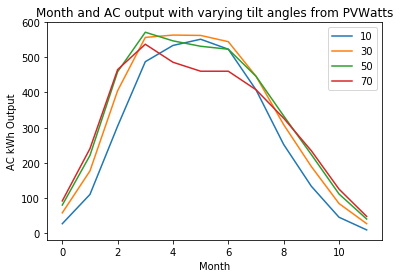

In [68]:
for i in range(len(tilt)):
    plt.plot(nrel_list_of_responses[i]['ac_monthly'], label = tilt[i])
plt.xlabel("Month")
plt.ylabel("AC kWh Output")
plt.title("Month and AC output with varying tilt angles from PVWatts")
plt.legend()

In [69]:
#Graph of annual production vs. tilt.
annual_production = []
for i in range(len(tilt)):
    annual_production.append(nrel_list_of_responses[i]['ac_annual'][2])
print(annual_production)

[3385.348388671875, 3922.596923828125, 4087.587646484375, 3883.735107421875]


Text(0.5, 1.0, 'Annual Production vs Tilt')

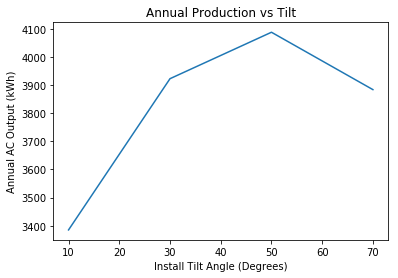

In [76]:
plt.plot(tilt, annual_production)
plt.xlabel("Install Tilt Angle (Degrees)")
plt.ylabel("Annual AC Output (kWh)")
plt.title("Annual Production vs Tilt")